In [2]:
from Swimmer import *
import numpy as np

## Initialization

In [3]:
T=1
R=1
a = 10*R
epsilons = np.linspace(0.1,5,50)*R

steps = 1000
nsteps = 1000
dt = T/steps

r0 = np.array([[0, 0, 0],
[0, 0, a],
[a*np.sqrt(8)/3, 0 , -a/3],
[-a*np.sqrt(8)/6, a*np.sqrt(24)/6 , -a/3],
[-a*np.sqrt(8)/6, -a*np.sqrt(24)/6, -a/3]])

### Visualization

In [4]:
epsilons

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

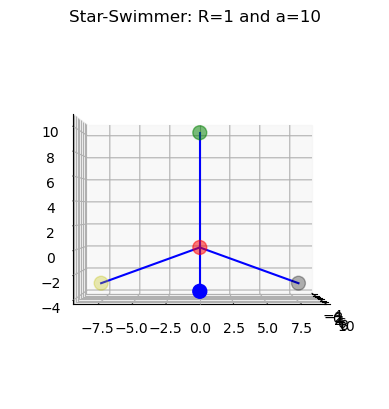

In [6]:
ax = visualize(r0)
plt.title(f"Star-Swimmer: R={R} and a={a}")
plt.savefig("1_1.png")

## Part1 : Comparing epsilon and changes

In [7]:
data = np.zeros((50,6))
for i in range(50):
    epsilon = epsilons[i]
    closing  = a - np.arange(steps+1)*epsilon/steps
    opening = a - epsilon + np.arange(steps+1)*epsilon/steps
    opened = a *np.ones(steps+1)
    closed = (a-epsilon)*np.ones(steps+1)

    totalRotation = np.eye(3)
    totalDelta = 0


    
    rf1,delta,Rotation=  act(np.array([closing,opened,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf2,delta,Rotation=  act(np.array([closed,closing,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf3,delta,Rotation=  act(np.array([closed,closed,closing,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf4,delta,Rotation=  act(np.array([closed,closed,closed,closing]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf5,delta,Rotation=  act(np.array([opening,closed,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf6,delta,Rotation=  act(np.array([opened,opening,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf7,delta,Rotation=  act(np.array([opened,opened,opening,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf8,delta,Rotation=  act(np.array([opened,opened,opened,opening]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)
    
    
    data[i,0:3] = totalDelta
    data[i,3:6] = Rot.from_matrix(totalRotation).as_euler("xyz",degrees=True)

In [7]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons[:]),np.log(np.abs(data[:,0])))
print(slope)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons[:]),np.log(np.abs(data[:,1])))
print(slope)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons[:]),np.log(np.abs(data[:,2])))
print(slope)

2.2566607069210125
2.2711108478851907
2.245650916036956


2.2566607069210125
2.2711108478851907
2.245650916036956
2.1563186137023096
2.1638633609305296
2.152755394088169


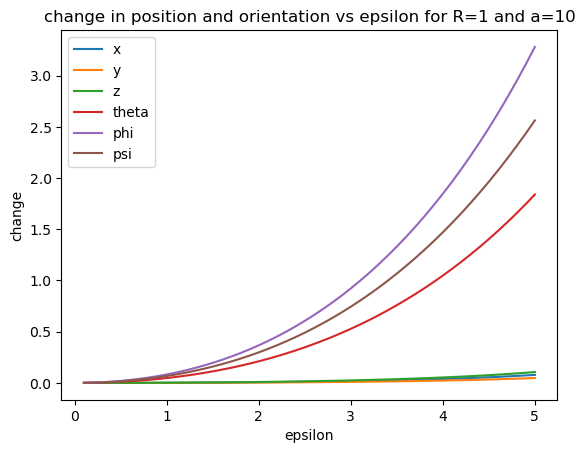

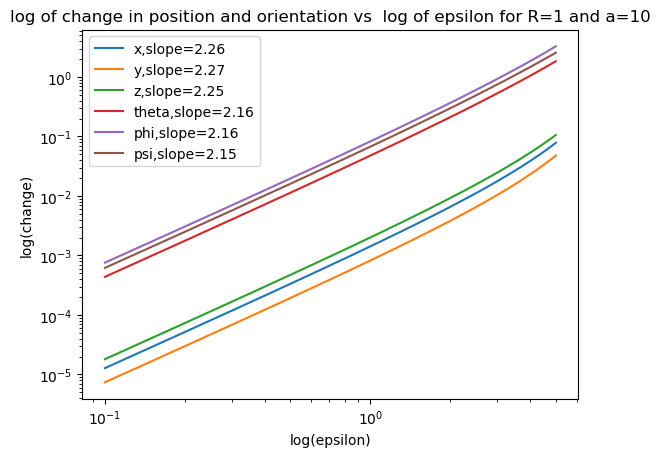

In [16]:
slopes = []  
for i in range(6):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons[:]),np.log(np.abs(data[:,i])))
    slopes.append(slope)
    print(slope)

plt.Figure(figsize=(10,10))
plt.title("change in position and orientation vs epsilon for R=1 and a=10")
plt.xlabel("epsilon")
plt.ylabel("change")
for i in range(6):
    plt.plot(epsilons,np.abs(data[:,i]))
    plt.legend(["x","y","z","theta","phi","psi"])
plt.savefig("1-2.png")
plt.show()


plt.Figure(figsize=(10,10))
plt.title("log of change in position and orientation vs  log of epsilon for R=1 and a=10")
plt.xlabel("log(epsilon)")
plt.ylabel("log(change)")
for i in range(6):
    plt.loglog(epsilons,np.abs(data[:,i]))
    plt.legend([f"x,slope={np.round(slopes[0],2)}",f"y,slope={np.round(slopes[1],2)}",f"z,slope={np.round(slopes[2],2)}",f"theta,slope={np.round(slopes[3],2)}",f"phi,slope={np.round(slopes[4],2)}",f"psi,slope={np.round(slopes[5],2)}"])
plt.savefig("1-3.png")
plt.show()





In [11]:
As = np.linspace(5,25,20)*R

In [12]:
Rs = np.linspace(1,3,20)

In [13]:
data2 = np.zeros((20,6))
for i in range(20):

    a = As[i]
    epsilon = 0.3*a
    closing  = a - np.arange(steps+1)*epsilon/steps
    opening = a - epsilon + np.arange(steps+1)*epsilon/steps
    opened = a *np.ones(steps+1)
    closed = (a-epsilon)*np.ones(steps+1)

    totalRotation = np.eye(3)
    totalDelta = 0


    
    rf1,delta,Rotation=  act(np.array([closing,opened,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf2,delta,Rotation=  act(np.array([closed,closing,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf3,delta,Rotation=  act(np.array([closed,closed,closing,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf4,delta,Rotation=  act(np.array([closed,closed,closed,closing]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf5,delta,Rotation=  act(np.array([opening,closed,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf6,delta,Rotation=  act(np.array([opened,opening,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf7,delta,Rotation=  act(np.array([opened,opened,opening,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf8,delta,Rotation=  act(np.array([opened,opened,opened,opening]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)
    
    
    data2[i,0:3] = totalDelta
    data2[i,3:6] = Rot.from_matrix(totalRotation).as_euler("xyz",degrees=True)

-0.16659725329922934
-0.16180152675140125
-0.16294937419612868
0.07081448339547222
0.071383717137344
0.07046730196010045


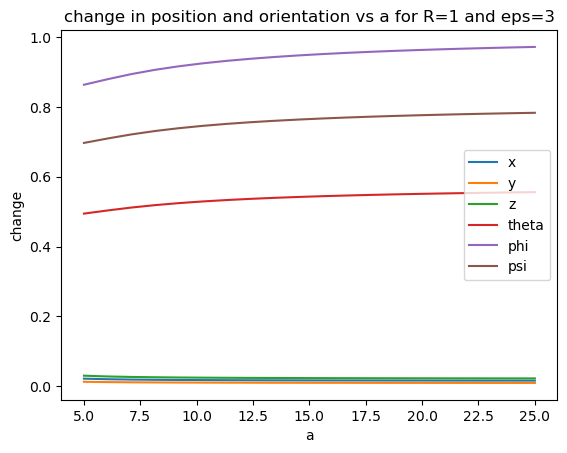

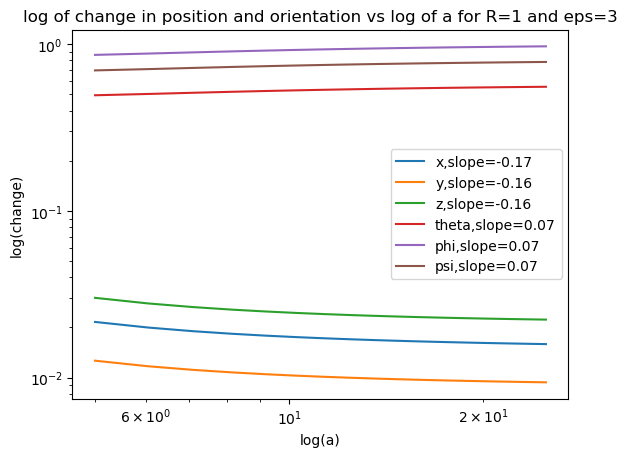

In [17]:
slopes2 = []  
for i in range(6):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(As[:]),np.log(np.abs(data2[:,i])))
    slopes2.append(slope)
    print(slope)

plt.Figure(figsize=(10,10))
plt.title("change in position and orientation vs a for R=1 and eps=3")
plt.xlabel("a")
plt.ylabel("change")
for i in range(6):
    plt.plot(As,np.abs(data2[:,i]))
plt.legend(["x","y","z","theta","phi","psi"])
plt.savefig("1-4.png")
plt.show()


plt.Figure(figsize=(10,10))
plt.title("log of change in position and orientation vs log of a for R=1 and eps=3")
plt.xlabel("log(a)")
plt.ylabel("log(change)")
for i in range(6):
    plt.loglog(As,np.abs(data2[:,i]))
plt.legend([f"x,slope={np.round(slopes2[0],2)}",f"y,slope={np.round(slopes2[1],2)}",f"z,slope={np.round(slopes2[2],2)}",f"theta,slope={np.round(slopes2[3],2)}",f"phi,slope={np.round(slopes2[4],2)}",f"psi,slope={np.round(slopes2[5],2)}"])
plt.savefig("1-5.png")
plt.show()


In [15]:
data3 = np.zeros((20,6))
for i in range(20):
    r = Rs[i]

    a = 10*r
    epsilon = 0.3*a
    closing  = a - np.arange(steps+1)*epsilon/steps
    opening = a - epsilon + np.arange(steps+1)*epsilon/steps
    opened = a *np.ones(steps+1)
    closed = (a-epsilon)*np.ones(steps+1)

    totalRotation = np.eye(3)
    totalDelta = 0


    
    rf1,delta,Rotation=  act(np.array([closing,opened,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf2,delta,Rotation=  act(np.array([closed,closing,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf3,delta,Rotation=  act(np.array([closed,closed,closing,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf4,delta,Rotation=  act(np.array([closed,closed,closed,closing]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf5,delta,Rotation=  act(np.array([opening,closed,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf6,delta,Rotation=  act(np.array([opened,opening,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf7,delta,Rotation=  act(np.array([opened,opened,opening,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf8,delta,Rotation=  act(np.array([opened,opened,opened,opening]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)
    
    
    data3[i,0:3] = totalDelta
    data3[i,3:6] = Rot.from_matrix(totalRotation).as_euler("xyz",degrees=True)

-0.09654065902221588
-0.09127035284742445
-0.09082726057800174
0.05010810489042857
0.050524465962579694
0.04985718833806309


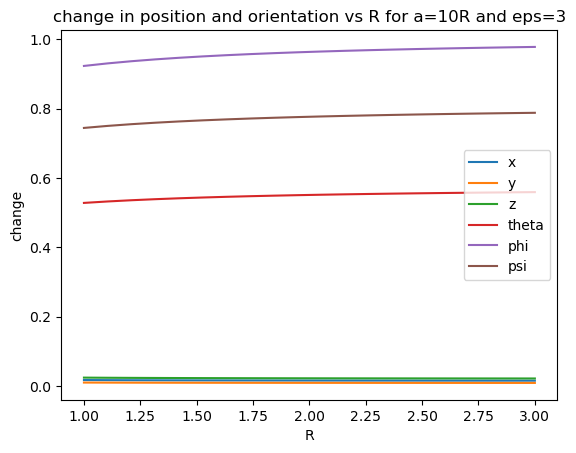

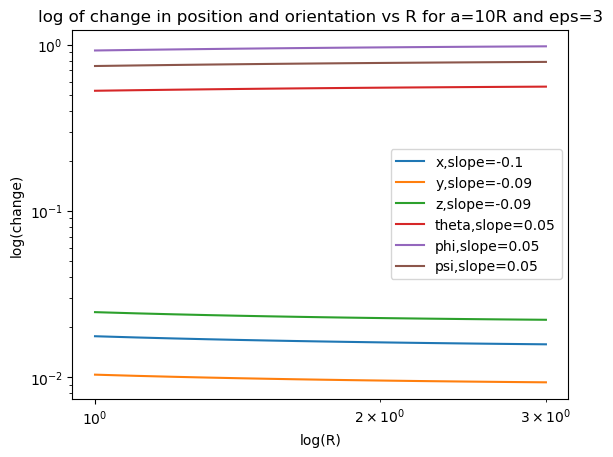

In [18]:
slopes3 = []  
for i in range(6):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(Rs[:]),np.log(np.abs(data3[:,i])))
    slopes3.append(slope)
    print(slope)

plt.Figure(figsize=(10,10))
plt.title("change in position and orientation vs R for a=10R and eps=3")
plt.xlabel("R")
plt.ylabel("change")
for i in range(6):
    plt.plot(Rs,np.abs(data3[:,i]))
plt.legend(["x","y","z","theta","phi","psi"])
plt.savefig("1-6.png")
plt.show()


plt.Figure(figsize=(10,10))
plt.title("log of change in position and orientation vs R for a=10R and eps=3")
plt.xlabel("log(R)")
plt.ylabel("log(change)")
for i in range(6):
    plt.loglog(Rs,np.abs(data3[:,i]))
plt.legend([f"x,slope={np.round(slopes3[0],2)}",f"y,slope={np.round(slopes3[1],2)}",f"z,slope={np.round(slopes3[2],2)}",f"theta,slope={np.round(slopes3[3],2)}",f"phi,slope={np.round(slopes3[4],2)}",f"psi,slope={np.round(slopes3[5],2)}"])
plt.savefig("1-7.png")
plt.show()
